# PIK3CA: Effects of Mutation on IRS1

<b> Standard imports for playing with and plotting data frames. </b>

In [56]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

<b> Import CPTAC data </b>

In [57]:
import CPTAC

In [58]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# PI3KCA mutation and IRS1 proteome abundance

### Perform a t-test with mutated and non-mutated protein levels

In [59]:
protList = ['IRS1']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.merge_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 

Test for IRS1: 
Ttest_indResult(statistic=-3.5379526832870027, pvalue=0.00055342765400399)


 ### We can now plot the data 

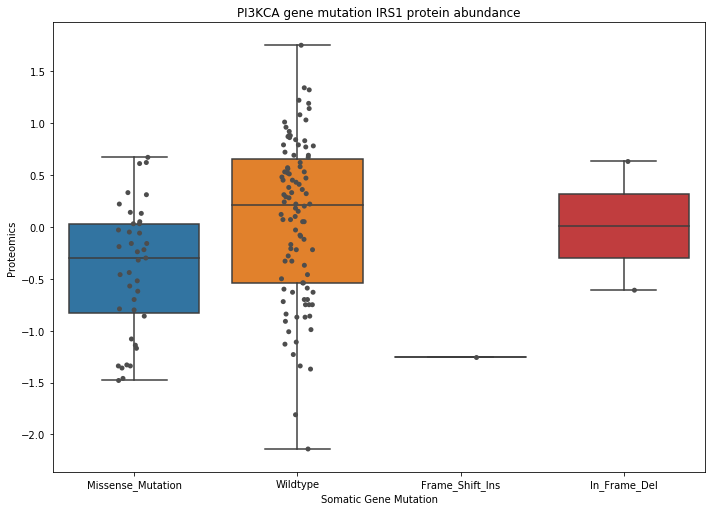

In [60]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='IRS1', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation IRS1 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='IRS1',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PI3KCA mutation and IRS1 proteome abundance (no control)

<b> Take out the control </b>

In [61]:
proteomics = proteomics[:100]

### Perform a t-test with mutated and non-mutated protein levels

In [62]:
protList = ['IRS1']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.merge_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest) 
        else:
            print("Unsignificant result for " + protein + ": ")
            print(ttest) 
            

Unsignificant result for IRS1: 
Ttest_indResult(statistic=-0.5010103010709803, pvalue=0.6175227666432365)


 ### We can now plot the data 

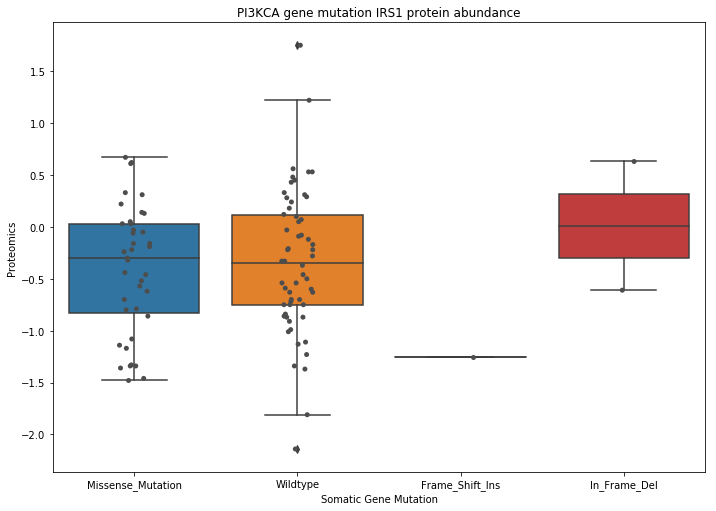

In [63]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y='IRS1', ax = ax)
somatic_boxplot.set_title("PI3KCA gene mutation IRS1 protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y='IRS1',jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

# PI3KCA mutation and IRS1 phosphoproteome abundance

In [65]:
sites = phos.columns;
significantPhosResults = [];
totalSites = 0


for protein in phosProtList:
    matchesdf = phos.filter(regex=protein)
    totalSites += len(matchesdf.columns)

pcutoff = 0.05 / totalSites

    

for protein in phosProtList:
    pattern = re.compile(protein)
    isInList = filter(pattern.search, sites)
    if next(isInList, None) is not None:
        phosphositesdf = CPTAC.merge_mutations(phos, protein, gene)
        for site in phosphositesdf.columns:
            if (site is not 'Mutation'):
                sitedf = CPTAC.merge_mutations(phos, site, gene)
                mutateddf = sitedf.loc[sitedf['Mutation'] == 'Missense_Mutation'].dropna(axis=0)
                wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
                ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
                if(ttest[1] <= pcutoff):
                    #significantResults.append(site)
                    print("Test for " + site + ": ")
                    print(ttest)             

Test for IRS1-S1100: 
Ttest_indResult(statistic=-4.622106285824137, pvalue=1.0484520589658975e-05)
Test for IRS1-S1101: 
Ttest_indResult(statistic=-4.385594568310565, pvalue=2.6789608760057653e-05)
Test for IRS1-S270: 
Ttest_indResult(statistic=-3.174535388441041, pvalue=0.001859256194718747)
Test for IRS1-S323: 
Ttest_indResult(statistic=-3.1585209409938275, pvalue=0.0020179736762149306)
Test for IRS1-S330: 
Ttest_indResult(statistic=-3.3292748915226333, pvalue=0.0012681260438923202)
Test for IRS1-S415: 
Ttest_indResult(statistic=-3.865988661402689, pvalue=0.0002073367241030126)
Test for IRS1-S531: 
Ttest_indResult(statistic=-3.3613860066999215, pvalue=0.0010270551532348862)
Test for IRS1-S629: 
Ttest_indResult(statistic=-3.1918506213584283, pvalue=0.001812000986004178)
